In [1]:
import pandas as pd

# Load the data from the CSV file
data_0 = pd.read_csv('result.csv', dtype={16: str})

print(data_0.iloc[5])

ISR                                                               203656231
Date received                                                     2022/1/23
Outcome                                                                 NaN
Drug_seq                                                     203656000000.0
Original name                                                       OZEMPIC
Pharma product                                                      ozempic
Drug name                                                       semaglutide
Role code                                              Primary Suspect Drug
Route                                                          Subcutaneous
Dosis                                                            0.5 mg, qw
Calculated daily dosis                                                  NaN
Indication                              product used for unknown indication
Event                     abdominal pain upper / dry eye / dry mouth / d...
Case_id     

In [2]:
print(data_0.columns.tolist())

['ISR', 'Date received', 'Outcome', 'Drug_seq', 'Original name', 'Pharma product', 'Drug name', 'Role code', 'Route', 'Dosis', 'Calculated daily dosis', 'Indication', 'Event', 'Case_id', 'Gender', 'Reporter country', 'Age in report']


In [3]:
print(len(data_0))

67824


In [4]:
data = data_0[data_0['Original name'].str.contains('semaglutide|ozempic|rybelsus', case=False, na=False)]

print(len(data))

19497


In [5]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame and it has already been loaded
# Check the unique values before replacement
print("Before:", data['Gender'].unique())

# Replace values where the condition is false
data['Gender'] = np.where(data['Gender'].isin(['F  ', 'M  ']), data['Gender'], 'unknown')

# Check the unique values after replacement to verify changes
print("After:", data['Gender'].unique())

Before: ['F  ' 'M  ' '23282017' '18209448' 'UNK' 'US' '22302222' '22142122'
 '22236873' '22100570' '22041440' '22035944' '21387630' '21459640']
After: ['F  ' 'M  ' 'unknown']


C:\Users\BruceSu\AppData\Local\Temp\ipykernel_21196\224107153.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = np.where(data['Gender'].isin(['F  ', 'M  ']), data['Gender'], 'unknown')


In [6]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame and it has already been loaded
# Check the unique values before replacement
print("Before cleaning:", data['Reporter country'].unique())

# Replace values where the condition is false
data['Reporter country'] = np.where(data['Reporter country'].str.len() == 2, data['Reporter country'], 'COUNTRY NOT SPECIFIED')

# Check the unique values after replacement to verify changes
print("After cleaning:", data['Reporter country'].unique())


Before cleaning: ['ES' 'US' 'DK' 'CA' 'FR' 'GB' 'COUNTRY NOT SPECIFIED' 'F  ' 'PK' 'JP'
 'M  ' 'SA' 'CH' 'NL' 'IT' 'CN' 'FI' 'JO' '61' 'BR' 'DE' 'NO' 'AT' 'AU'
 'PL' 'IL' 'BE' 'RU' 'SE' 'AR' 'CO' 'CR' 'GR' 'PT' 'IE' '52' 'IN' 'SK'
 'ZA' 'TR' 'CZ' 'RO' 'MX' '51' '27' 'HK' '46' 'SG' 'CL' 'PA' 'BG' 'HU'
 '70' '40' 'PH' 'LB' '68' '42' '45' '35' 'SI' '54' '49' 'GE' 'LU' 'KR'
 '63' 'DZ' 'TW' 'EG' 'MY' 'AE' '64' '57' '53' '28' 'UA' '62' '47' 'TH'
 'IS' 'MK' 'RS' '33' '50' 'UY' 'QA' 'PR' 'DO' 'CY' '36' '26' '73' 'HR'
 '65' 'ID' '59' 'EE']
After cleaning: ['ES' 'US' 'DK' 'CA' 'FR' 'GB' 'COUNTRY NOT SPECIFIED' 'PK' 'JP' 'SA' 'CH'
 'NL' 'IT' 'CN' 'FI' 'JO' '61' 'BR' 'DE' 'NO' 'AT' 'AU' 'PL' 'IL' 'BE'
 'RU' 'SE' 'AR' 'CO' 'CR' 'GR' 'PT' 'IE' '52' 'IN' 'SK' 'ZA' 'TR' 'CZ'
 'RO' 'MX' '51' '27' 'HK' '46' 'SG' 'CL' 'PA' 'BG' 'HU' '70' '40' 'PH'
 'LB' '68' '42' '45' '35' 'SI' '54' '49' 'GE' 'LU' 'KR' '63' 'DZ' 'TW'
 'EG' 'MY' 'AE' '64' '57' '53' '28' 'UA' '62' '47' 'TH' 'IS' 'MK' 'RS'
 '33' '50' 'UY' '

C:\Users\BruceSu\AppData\Local\Temp\ipykernel_21196\1111600639.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Reporter country'] = np.where(data['Reporter country'].str.len() == 2, data['Reporter country'], 'COUNTRY NOT SPECIFIED')


In [7]:
import pandas as pd

# Check the unique values before cleaning
print("Before cleaning:", data['Age in report'].unique())

# Convert non-numeric values and those over 100 to NaN (instead of "UNKNOWN")
data['Age in report'] = pd.to_numeric(data['Age in report'], errors='coerce')  # Convert errors to NaN
data['Age in report'] = data['Age in report'].where(data['Age in report'] <= 100)

# Remove rows where 'Age in report' is NaN
data = data.dropna(subset=['Age in report'])

# Check the unique values after cleaning to verify changes
print("After cleaning:", data['Age in report'].unique())
print(len(data))

Before cleaning: ['63' '46' '64' '57' '52' '49' '37' '66' '67' '56' '70' '73' '76' '74'
 '59' '45' '53' '58' '54' '51' '84' '48' '68' 'US' '69' '55' '72' '42'
 '75' '78' '71' '50' '65' '62' '20' '61' '23' '60' '87' '82' '35' '21'
 '29' '44' '47' '25' '80' '90' '38' '40' nan '81' '77' '39' '36' '27' 'AU'
 '79' '30' '34' '32' '26' '43' '31' '83' '33' '19' '85' '24' '28' '41'
 '92' '91' '89' '22' '86' '88' '94' '93' '100' '18' '400' '96']
After cleaning: [ 63.  46.  64.  57.  52.  49.  37.  66.  67.  56.  70.  73.  76.  74.
  59.  45.  53.  58.  54.  51.  84.  48.  68.  69.  55.  72.  42.  75.
  78.  71.  50.  65.  62.  20.  61.  23.  60.  87.  82.  35.  21.  29.
  44.  47.  25.  80.  90.  38.  40.  81.  77.  39.  36.  27.  79.  30.
  34.  32.  26.  43.  31.  83.  33.  19.  85.  24.  28.  41.  92.  91.
  89.  22.  86.  88.  94.  93. 100.  18.  96.]
19437


C:\Users\BruceSu\AppData\Local\Temp\ipykernel_21196\115800254.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age in report'] = pd.to_numeric(data['Age in report'], errors='coerce')  # Convert errors to NaN
C:\Users\BruceSu\AppData\Local\Temp\ipykernel_21196\115800254.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age in report'] = data['Age in report'].where(data['Age in report'] <= 100)


In [8]:
data_1 = data.drop_duplicates(subset='Case_id', keep='first')
print(len(data_1))

14114


In [9]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Convert text to lowercase
data_1['Event'] = data_1['Event'].str.lower()

# Tokenization and cleaning
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remove URLs, punctuation, and numbers
    text = nltk.re.sub(r'http\S+', '', text)  # Remove URLs
    text = nltk.re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = nltk.re.sub(r'\d+', '', text)      # Remove numbers

    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and short words
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    
    # Join tokens back into a string
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text

data_1['Cleaned_Text'] = data_1['Event'].apply(clean_text)

# Now data_1['Cleaned_Text'] contains cleaned events as continuous text.
print(data_1['Cleaned_Text'].head())

C:\Users\BruceSu\AppData\Local\Temp\ipykernel_21196\3276215043.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Event'] = data_1['Event'].str.lower()
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BruceSu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BruceSu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BruceSu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


2                              diarrhoea renal failure
3                                 erectile dysfunction
5    abdominal pain upper dry eye dry mouth dysgeus...
7                                   diarrhoea vomiting
9    concussion dehydration dizziness fall head inj...
Name: Cleaned_Text, dtype: object


C:\Users\BruceSu\AppData\Local\Temp\ipykernel_21196\3276215043.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Cleaned_Text'] = data_1['Event'].apply(clean_text)


In [10]:
events_text = " ".join(data_1['Event'].dropna().astype(str))  # Convert all event texts into a single string

# Convert text to lowercase and tokenize
tokens = word_tokenize(events_text.lower())
total_words = len(tokens)

# Removing stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]  # Remove non-alphabetic tokens
remaining_words = len(filtered_tokens)

total_words, remaining_words

(127410, 88982)

In [11]:
print(data_1['Cleaned_Text'])

2                                  diarrhoea renal failure
3                                     erectile dysfunction
5        abdominal pain upper dry eye dry mouth dysgeus...
7                                       diarrhoea vomiting
9        concussion dehydration dizziness fall head inj...
                               ...                        
67802    product dose omission issue psoriasis therapeu...
67816    blood glucose decreased constipation decreased...
67817    dizziness hyperhidrosis label use palpitation ...
67818                                       covid vomiting
67823                                            dizziness
Name: Cleaned_Text, Length: 14114, dtype: object


In [12]:
import pandas as pd

data_1['Event'] = data_1['Event'].str.split('/')
data_2 = data_1.explode('Event').reset_index(drop=True)

# Optionally, you might want to clean up whitespace and convert each event to lowercase
data_2['Event'] = data_2['Event'].str.strip().str.lower()

# Save the processed data to a new CSV file
data_2.to_csv('processed_data_2.csv', index=False)

# Optionally, display the head of the new DataFrame to confirm it looks correct
print(data_2.head())


C:\Users\BruceSu\AppData\Local\Temp\ipykernel_21196\3053573682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Event'] = data_1['Event'].str.split('/')


         ISR Date received                                        Outcome  \
0  190090071     2021/3/16  Hospitalization - Initial or Prolonged/ Other   
1  190090071     2021/3/16  Hospitalization - Initial or Prolonged/ Other   
2  220466471     2023/2/28                                          Other   
3  203656231     2022/1/23                                            NaN   
4  203656231     2022/1/23                                            NaN   

       Drug_seq Original name Pharma product    Drug name  \
0  1.900900e+11       OZEMPIC        ozempic  semaglutide   
1  1.900900e+11       OZEMPIC        ozempic  semaglutide   
2  2.204660e+11   SEMAGLUTIDE            NaN  semaglutide   
3  2.036560e+11       OZEMPIC        ozempic  semaglutide   
4  2.036560e+11       OZEMPIC        ozempic  semaglutide   

                Role code         Route       Dosis Calculated daily dosis  \
0  Secondary Suspect Drug       Unknown         UNK                    NaN   
1  Secondary S

In [13]:
print(len(data_2))

48055


In [14]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
model = AutoModelForTokenClassification.from_pretrained("dmis-lab/biobert-v1.1")
nlp = pipeline("ner", model=model, tokenizer=tokenizer)

C:\Users\BruceSu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of BertForTokenClassification were not initialized from the model checkpoint at dmis-lab/biobert-v1.1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

categories = pd.read_excel('MedDRA.xlsx', usecols=['pt_name_en'])
unique_categories = categories['pt_name_en'].unique()

print(unique_categories)

['COAGULATION FACTOR DEFICIENCY' 'COLOUR BLINDNESS ACQUIRED'
 'EAR DEFORMITY ACQUIRED' ... 'ACNE OCCUPATIONAL' 'ACNE VARIOLIFORMIS'
 'ACOUSTIC NEUROMA REMOVAL']


In [16]:

model_name = "tdobrxl/ClinicBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

vectorizer = TfidfVectorizer()
category_vectors = vectorizer.fit_transform(unique_categories)

def find_best_match(text, category_vectors, unique_categories):
    text_vector = vectorizer.transform([text])
    similarities = cosine_similarity(text_vector, category_vectors)
    best_match_index = similarities.argmax()
    best_match_score = similarities[0][best_match_index] 
    similarity_threshold = 0.5  

    if best_match_score < similarity_threshold:
        return 'Uncategorized'
    else:
        return unique_categories[best_match_index]

def classify_and_match_event(event):

    result = classifier(event)
    predicted_category = result[0]['label']
    
    best_match = find_best_match(event, category_vectors, unique_categories)
    
    if predicted_category in unique_categories and predicted_category == best_match:
        return predicted_category
    else:
        return best_match  

data_2['Category'] = data_2['Event'].apply(classify_and_match_event)

data_2.to_csv('final_classified_data.csv', index=False)

print(data_2.head())

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at tdobrxl/ClinicBERT and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
category_counts = data_2['Category'].value_counts()
print(category_counts.head(20))

Category
NAUSEA                                              2523
VOMITING                                            1755
DIARRHOEA                                           1386
OFF LABEL USE                                       1151
DECREASED APPETITE                                   900
HEADACHE                                             719
WEIGHT DECREASED                                     699
CONSTIPATION                                         694
FATIGUE                                              676
BLOOD GLUCOSE INCREASED                              667
DIZZINESS                                            610
ABDOMINAL PAIN UPPER                                 542
PRODUCT USE IN UNAPPROVED INDICATION                 500
ABDOMINAL PAIN                                       480
ASTHENIA                                             449
MALAISE                                              383
DEHYDRATION                                          381
INAPPROPRIATE SCHEDULE

In [37]:
len(data_2) / len(data_1)

3.404775400311747

各变量缺失值数量：
Role code         0
Indication        0
Gender            0
Age Group         0
Year              0
Event Category    0
dtype: int64


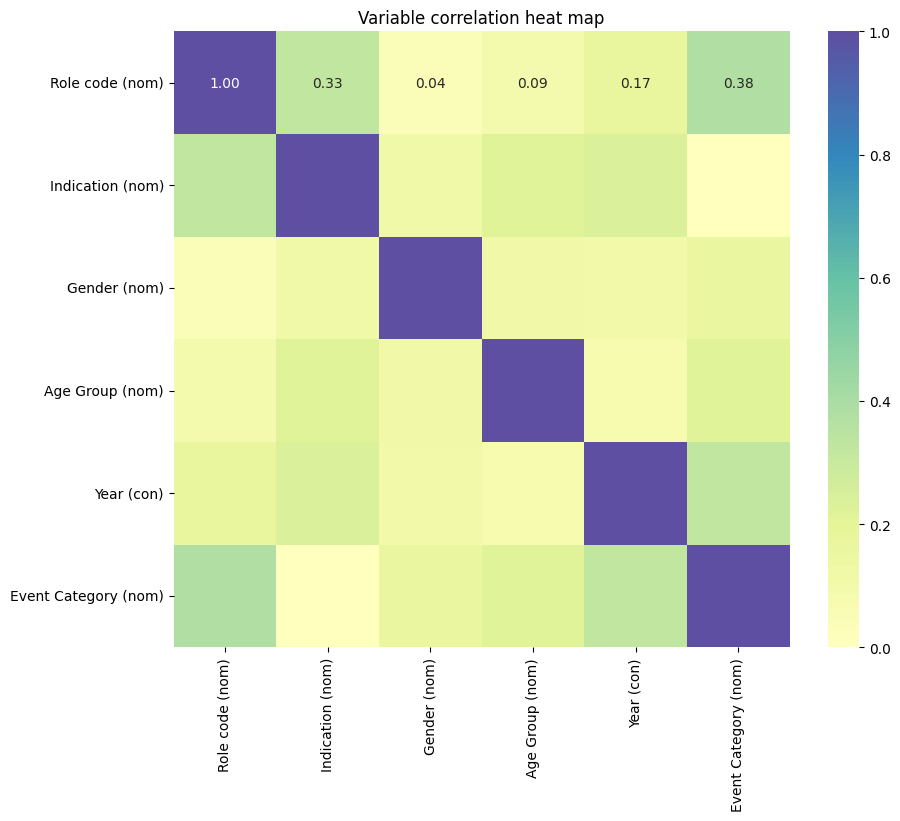

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from dython import nominal

# 1. 读取文件“classified_data.csv”中的数据形成data_3
data_3 = pd.read_csv('classified_data.csv')

# 2. 对缺失值处理：检查上述变量中是否存在缺失值。对于缺失值，可以选择删除相关记录
selected_vars = ['Role code', 'Indication', 'Gender', 'Age Group', 'Year', 'Event Category']
data_3 = data_3[selected_vars]

# 检查缺失值
print("各变量缺失值数量：")
print(data_3.isnull().sum())

# 删除包含缺失值的记录
data_3 = data_3.dropna()

# 将Year转换为数值类型
data_3['Year'] = pd.to_numeric(data_3['Year'], errors='coerce')

# 再次处理缺失值（由于转换可能引入NaN）
data_3 = data_3.dropna()

# 3. 确保分类变量为字符串类型
categorical_vars = ['Role code', 'Indication', 'Gender', 'Age Group', 'Event Category']
for col in categorical_vars:
    data_3[col] = data_3[col].astype(str)

# 4. 保留数值变量Year不变

# 5. 绘制所选变量的关联度热力图
associations = nominal.associations(
    data_3,
    nominal_columns=categorical_vars,
    figsize=(10, 8),
    mark_columns=True,
    cmap='Spectral',
    annot=True,
    fmt='.2f',
    title='Variable correlation heat map'
)

# 显示图形
plt.show()


In [36]:
print("\nRole code 的所有唯一值：")
print(data_3['Role code'].unique())

print("\nIndication 的所有唯一值：")
print(data_3['Indication'].unique())

print("\nEvent Category 的所有唯一值：")
print(data_3['Event Category'].unique())


Role code 的所有唯一值：
['Secondary Suspect Drug' 'Primary Suspect Drug' 'Concomitant'
 'Interacting']

Indication 的所有唯一值：
[' product used for unknown indication' ' ' ' weight decreased'
 ' diabetes mellitus' ' obesity' ' type 2 diabetes mellitus'
 ' blood glucose increased' ' glucose tolerance impaired'
 ' type 1 diabetes mellitus' ' weight control' ' cardiac disorder'
 ' postprandial hypoglycaemia' ' overweight'
 ' diabetes mellitus weight decreased'
 ' glucose tolerance impaired obesity' ' insulin resistant diabetes'
 ' glycosylated haemoglobin increased'
 ' glycosylated haemoglobin decreased' ' deep vein thrombosis'
 ' adverse drug reaction' ' hepatic steatosis' ' metabolic syndrome'
 ' diabetes mellitus inadequate control' ' body mass index increased'
 ' poisoning deliberate' ' insulin resistance' ' drug therapy'
 ' weight increased' ' cartilage graft'
 ' diabetes mellitus weight loss diet' ' pain' ' glycosylated haemoglobin'
 ' glucose tolerance impaired weight decreased'
 ' diabetes 